In [31]:
import numpy as np 
from keras.utils import to_categorical 
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense,Conv2D,BatchNormalization,LeakyReLU,Dropout,Activation
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt 

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
num_classes = 10

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
y_train = to_categorical(y_train, num_classes)
y_test= to_categorical(y_test, num_classes)

In [6]:
# Building the model 
'''
input_layer = Input(shape=(32,32,3)) 
x = Flatten()(input_layer)
x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)
output_layer = Dense(units = 10, activation  = 'softmax')(x)
model = Model(input_layer, output_layer)'''

In [32]:
input_layer = Input((32,32,3))
x = Conv2D(filters = 32, kernel_size = 3 , strides = 1, padding = 'same')(input_layer) 
x = BatchNormalization()(x) 
x = LeakyReLU()(x)
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x) 
x = BatchNormalization()(x) 
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x) 
x = BatchNormalization()(x) 
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x) 
x = BatchNormalization()(x) 
x = LeakyReLU()(x)
x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x) 
x = LeakyReLU()(x) 
x = Dropout(rate = 0.5)(x)
x = Dense(num_classes)(x) 
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer) 

In [33]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 16, 16, 32)       

In [35]:
# Compiling the model
opt = Adam(lr=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



In [36]:
# Training the model 
model.fit(x_train, y_train, batch_size = 32, epochs= 100, shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 155s 99ms/step - loss: 1.5587 - accuracy: 0.4500
Epoch 2/100
1563/1563 [==============================] - 155s 99ms/step - loss: 1.1470 - accuracy: 0.5961
Epoch 3/100
1563/1563 [==============================] - 155s 99ms/step - loss: 1.0011 - accuracy: 0.6488
Epoch 4/100
1563/1563 [==============================] - 155s 99ms/step - loss: 0.9225 - accuracy: 0.6791
Epoch 5/100
1563/1563 [==============================] - 156s 100ms/step - loss: 0.8557 - accuracy: 0.7015
Epoch 6/100
1563/1563 [==============================] - 156s 100ms/step - loss: 0.8005 - accuracy: 0.7208
Epoch 7/100
1563/1563 [==============================] - 156s 100ms/step - loss: 0.7631 - accuracy: 0.7320
Epoch 8/100
1563/1563 [==============================] - 157s 100ms/step - loss: 0.7201 - accuracy: 0.7507
Epoch 9/100
1563/1563 [==============================] - 157s 101ms/step - loss: 0.6857 - accuracy: 0.7609
Epoch 10/100
1563/1563 [=================

In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 1.5561 - accuracy: 0.7184


[1.5560858249664307, 0.7184000015258789]

In [38]:
classes = np.array(['airplane','automobile','bird','cat','deer','dog',
                    'frog','horse','ship','truck'])
preds = model.predict(x_test)
preds_single = classes[np.argmax(preds, axis= -1)]
actual_single = classes[np.argmax(y_test, axis= -1)]
                                 

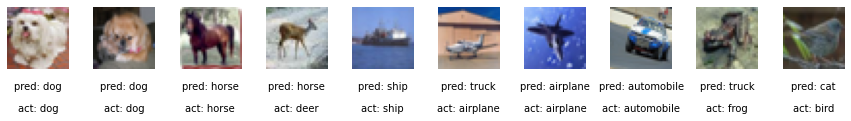

In [44]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,idx in enumerate(indices): 
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5,-0.35, 'pred: '+str(preds_single[idx]),fontsize=10,
          ha='center',transform=ax.transAxes)
  ax.text(0.5,-0.7, 'act: '+str(actual_single[idx]), fontsize=10,
          ha='center',transform=ax.transAxes)
  ax.imshow(img)
